# Wenkai Xu's Little Project
Don Quixote  Versus. 20'000 Leagues Under the Sea

# Introduction: 
In this little project, I will explore statistics for two classic novels: Don Quixote by Miguel de Cervantes and 20'000 Leagues Under the Sea by Jules Verne. The two books are in totally different genres: Don Quixote is a kind of satire or parody novel while 20'000 Leagues Under the Sea is a science fiction. Intuitively, the authors' narrative styles or contents of different genres are usually distinct. From Python programming language used below, I find out several differences between the two books.


In [66]:
# Run this first
from datascience import *
from datascience.predicates import are
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [84]:
# Don Quixote and 20'000 Leagues Under the Sea

Don_url = 'http://www.gutenberg.org/files/5921/5921-0.txt'
Don_text = read_url(Don_url)
Don_chapters = Don_text.split('CHAPTER ')[53:]

Sea_url = 'http://www.gutenberg.org/cache/epub/164/pg164.txt'
Sea_text = read_url(Sea_url)
Sea_chapters = Sea_text.split('CHAPTER ')[1:]

# Literary Characters

The book describes a gentleman named Quixote who reads so many chivalric romances that he loses his sanity and decides to set out to revive chivalry.He recruits a simple farmer, Sancho as his squire to begin his journey. We can quickly visualize how many times these characters have each been mentioned at any point in the book.

In [85]:
# Display the chapters of Don Quixote in a table.

Table().with_column('Chapters', Don_chapters)

Chapters
I. WHICH TREATS OF THE CHARACTER AND PURSUITS OF THE FAM ...
II. WHICH TREATS OF THE FIRST SALLY THE INGENIOUS DON QU ...
III. WHEREIN IS RELATED THE DROLL WAY IN WHICH DON QUIXO ...
IV. OF WHAT HAPPENED TO OUR KNIGHT WHEN HE LEFT THE INN ...
V. IN WHICH THE NARRATIVE OF OUR KNIGHT’S MISHAP IS CONT ...
VI. OF THE DIVERTING AND IMPORTANT SCRUTINY WHICH THE CU ...
VII. OF THE SECOND SALLY OF OUR WORTHY KNIGHT DON QUIXOT ...
VIII. OF THE GOOD FORTUNE WHICH THE VALIANT DON QUIXOTE ...
IX. IN WHICH IS CONCLUDED AND FINISHED THE TERRIFIC BATT ...
X. OF THE PLEASANT DISCOURSE THAT PASSED BETWEEN DON QUI ...


In [102]:
# Count how many times the names Don Quixote, Sancho, Dulcinea and Rocinante appear in each chapter.

counts = Table().with_columns([
        'Don Quixote', np.char.count(Don_chapters, 'Don Quixote'),
        'Sancho', np.char.count(Don_chapters, 'Sancho'),
        'Dulcinea', np.char.count(Don_chapters, 'Dulcinea'),
        'Rocinante', np.char.count(Don_chapters, 'Rocinante')
    ])

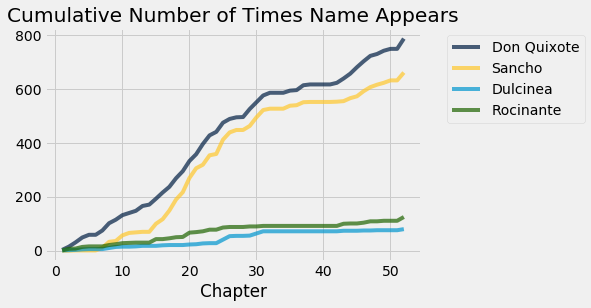

In [103]:
# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 53, 1))
cum_counts.plot(column_for_xticks=4)
plots.title('Cumulative Number of Times Name Appears');

Here is the frequency of main characters in Don Quixote. From the graph above, we can clearly see that the main characters are Quixote and Sancho. The third biggest "character" is Rocinante, who is a horse of Quixote. The novel is mainly about Quixote and his squire Sancho, as well as Quixote's the crazy imagination of chivalry. 

20'000 Leagues Under the Sea tells a story about Professor Aronnax and his assistant Conseil's adventure in Captain Nemo's ship under the sea.

In [104]:
# The chapters of 20'000 Leagues Under the Sea, in a table

Table().with_column('Chapters', Sea_chapters)

Chapters
I A SHIFTING REEF The year 1866 was signalised by a rema ...
II PRO AND CON At the period when these events took plac ...
III I FORM MY RESOLUTION Three seconds before the arriva ...
"IV NED LAND Captain Farragut was a good seaman, worthy o ..."
V AT A VENTURE The voyage of the Abraham Lincoln was for ...
VI AT FULL STEAM At this cry the whole ship's crew hurri ...
VII AN UNKNOWN SPECIES OF WHALE This unexpected fall so ...
"VIII MOBILIS IN MOBILI This forcible abduction, so rough ..."
IX NED LAND'S TEMPERS How long we slept I do not know; b ...
X THE MAN OF THE SEAS It was the commander of the vessel ...


In [105]:
# Counts of names in the chapters of 20'000 Leagues Under the Sea



counts = Table().with_columns([
        'Aronnax', people_counts['Aronnax'],
        'Conseil', people_counts['Conseil'],
        'Ned Land', people_counts['Ned Land'],
        'Nemo', people_counts['Nemo'],
    ])

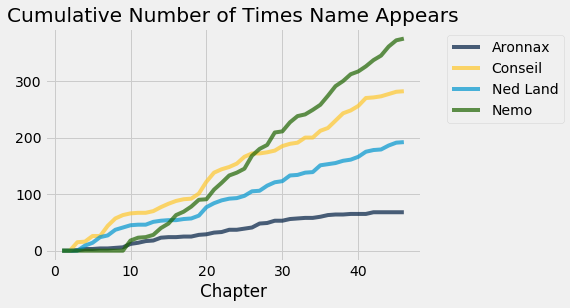

In [106]:
# Plot the cumulative counts.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 47, 1))
cum_counts.plot(column_for_xticks=4)
plots.title('Cumulative Number of Times Name Appears');

From the graph above, we can visualize that Captain Nemo appears most frequently because everything is happened in his ship and he is the most important and mysterious character in the novel. For Prof. Aronnax, though he plays a central role, his name hardly appears at all because he is the narrator. Comparing both graphs, we can see the difference: In Don Quixote, the story is solely about Don Quixote, meeting with random peoples. However, in 20'000 Leagues Under the Sea, the storyline is about the four main characters and their interactions in the enclosed environment.

# Secondly,

I look on the Chapter Length and Number of Periods of both novels.
I have found something interesting which is different from our readings. 
Two different novels tend to have different ratio of chapter length to number of periods.

In [107]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_Don = Table().with_columns([
        'Don Chapter Length', [len(s) for s in Don_chapters],
        'Number of Periods', np.char.count(Don_chapters, '.')
    ])
chars_periods_Sea = Table().with_columns([
        'Sea Chapter Length', [len(s) for s in Sea_chapters],
        'Number of Periods', np.char.count(Sea_chapters, '.')
    ])

In [108]:
# The counts for Huckleberry Finn

chars_periods_Don

Don Chapter Length,Number of Periods
10971,37
12811,39
13647,42
13754,52
8987,27
14968,78
10777,44
16887,66
11389,33
11124,33


Here are the corresponding data for 20'000 Leagues Under the Sea:

In [109]:
# The counts for 20'000 Leagues Under the Sea

chars_periods_Sea

Sea Chapter Length,Number of Periods
9798,69
9229,76
5837,63
10515,83
9317,81
13619,153
10948,117
11319,120
5000,54
26950,240


We can see that the chapter length of the two novels is similar, but 20'000 Leagues Under the Sea uses twice as many as number of periods compared with in Don Quixote. Why does 20'000 Leagues Under the Sea use more periods?

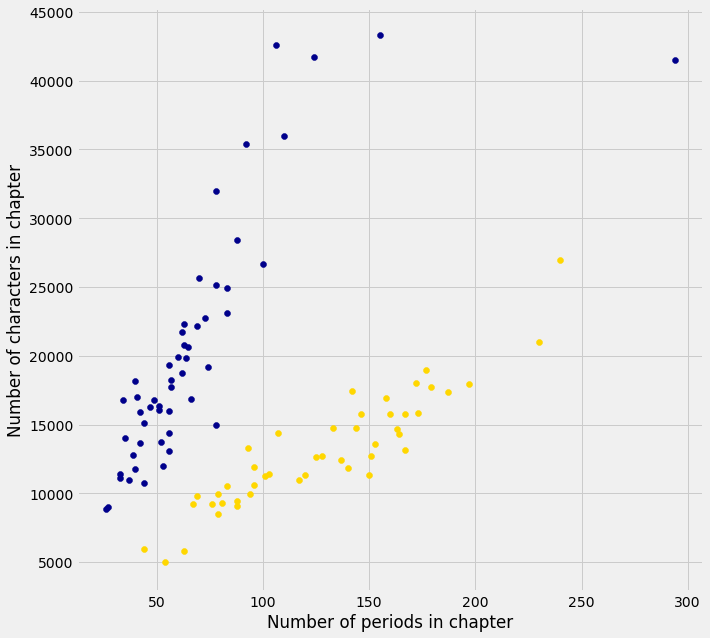

In [96]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_Don[1], chars_periods_Don[0], color='darkblue')
plots.scatter(chars_periods_Sea[1], chars_periods_Sea[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

The plot above helps us clearly visualize the relationship between chapter length and number of periods in two different books. The blue points are for Don Quixote and the yellow ones stand for 20'000 Leagues Under the Sea. The blue points' slope is much more steep than the yellow ones', which means ratio of chapter length to number of periods is larger in Don Quixote. In Don Quixote, it's about 320 characters per period and in 20'000 Leagues Under the Sea its about 100 characters per period. The conclusion of what we can draw from data is that 20'000 Leagues Under the Sea uses periods much more frequently. The reason behind this needs further investigation. I will first just take a guess: In 20'000 Leagues Under the Sea, there're many conversations between the four main protagonists. Conversations can be very short for just like one to five words. However, Don Quixote mainly describes the activities of Quixote and is lack of conversations which makes the overall sentences lengthy. 

# Thirdly,

I begin to investigate the counts of different types of character in the first chapter of Don Quixote and fourth chapter of 20'000 Leagues Under the Sea. I choose 1st chapter of Don and 4th of Sea because both chapter has approximately 10000 characters in total.

In [131]:
from collections import Counter

chapter_one = Don_chapters[0]
counts = Counter(chapter_one.lower())
letters = Table([counts.keys(), counts.values()], ['Letters', 'Chapter 1 Count'])
letters.sort('Letters').show(20)

Letters,Chapter 1 Count
,2031
!,1
(,4
),4
",",187
-,25
.,37
;,13
?,1
a,780


In [132]:
Sea_chapter_four = Sea_chapters[3]
counts = Counter(Sea_chapter_four.lower())
letters = Table([counts.keys(), counts.values()], ['Letters', 'Chapter 4 Count'])
letters.sort('Letters').show(20)

Letters,Chapter 4 Count
,1859
!,8
"""",62
',4
(,3
),3
",",180
-,22
.,83
0,34


From the two data, we can see that in chapter 4 of 20'000 Leagues Under the Sea, there're 62 double quotation marks "" in total while in Don Quixote there's no double quotation mark. By viewing 20'000 Leagues Under the Sea's text, there are indeed many short conversations between Nemo and Aronnax in that chapter. Also, there are 8 exclamation marks in 20'000 Leagues Under the Sea, exclamation marks always appear in a conversation. This result confirms my guess. What's more, I also find another interesting thing: in 20'000 Leagues Under the Sea, there are always many number characters(0-9) while in Don Quixote there is always no numbers at all! I think it is because 20000 Leagues Under the Sea is a sci-fi novel which always need numbers in its narration.


# Conclusion:

From Python Programming and data visualization, I can indeed find something unnoticed before. Computers are quick at reading and dealing with data, combining multiple sources. We can use the computer to get some information that would be tedious to acquire by hand. From the statistics of this project, I found out novels are not strictly following the "100-150 characters per period" rule. It depends on the genre and the author's narrative method.